# EDA

here we give a brief introduction into the base dataset - note that in some sections, additional model-specific exploration was necessary, and is included directly there.

We import the necessary packages and take a first look at the data:

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


with open('./vgsales.csv', mode='r') as file:
    df = pd.read_csv(file)

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [3]:
df.shape

(16598, 11)

as we see, theres 16,500 data points, with a numeric and categorical attributes.

We take a brief look at the number of unique platforms, and how many games are released for each:

In [4]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [5]:
df.groupby('Platform').size().sort_values(ascending=False)

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
dtype: int64

we can see that some games are released on multiple platforms or mulitple times - here we take a look at the top 10 games that were re-released the most:

In [6]:
df.groupby('Name').size().sort_values(ascending=False).head(10)

Name
Need for Speed: Most Wanted     12
FIFA 14                          9
Madden NFL 07                    9
LEGO Marvel Super Heroes         9
Ratatouille                      9
Angry Birds Star Wars            8
FIFA 15                          8
FIFA Soccer 13                   8
Madden NFL 08                    8
LEGO Harry Potter: Years 5-7     8
dtype: int64

next we check the number of genres and publishers:

In [7]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

for publishers, the list is fairly extensive, we check for the total amount:

In [8]:
len(df['Publisher'].unique())

579

and the top 10 most prolific publishers:

In [9]:
df.groupby('Publisher').size().sort_values(ascending=False).head(10)

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
dtype: int64

no surprises here, with some big names leading the list.

Next we take a brief look if there is any data missing

In [10]:
df.isna().any().sort_values()

Rank            False
Name            False
Platform        False
Genre           False
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
Year             True
Publisher        True
dtype: bool

and then we check how much data is missing:

In [11]:
df[['Year', 'Publisher']].isna().mean().sort_values(ascending=False)

Year         0.016327
Publisher    0.003494
dtype: float64

it looks like missing data should not be a huge problem here - Imputation will be handled in the specific modeling sections.

We take a brief look at the correlation between the numeric variables:

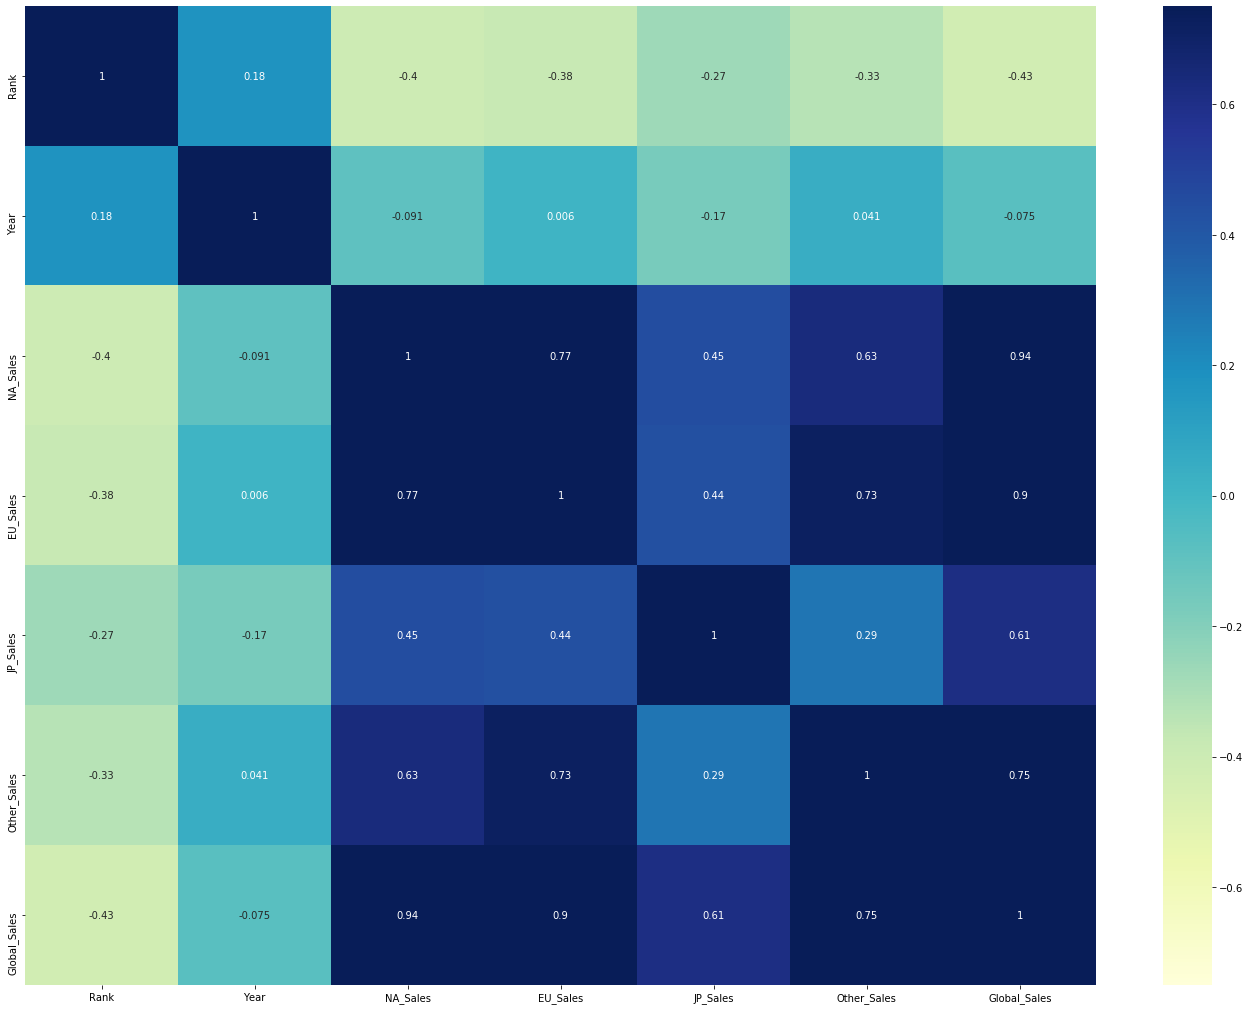

In [22]:
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(),
            annot=True,
            cmap='YlGnBu',
            vmin=-.75,
            vmax=.75)

as expected, there is a strong correlation, since rank is based on the global sales directly, which in turn is composed of the sales of the easy territories.

The distribution of the sales was listed in the .describe() function already, but a boxplot will make it visually easier to read:

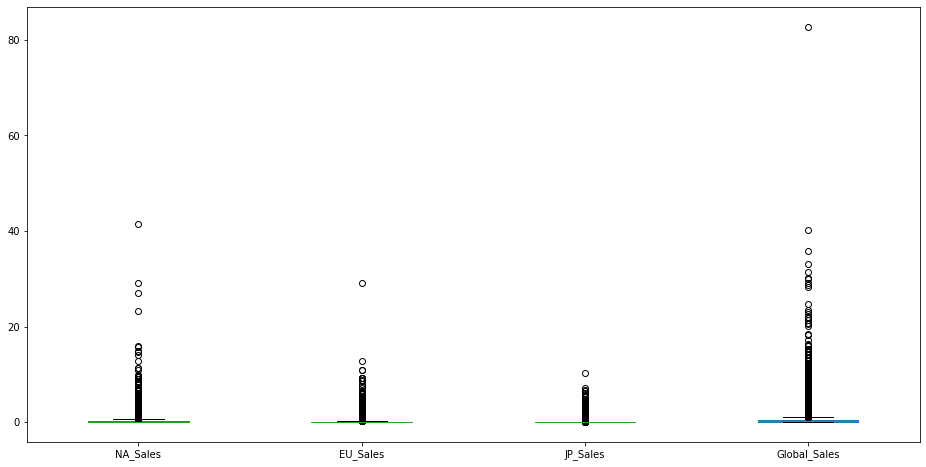

In [14]:
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].plot.box(figsize=(16,8))

as expected from video game sales, there are extreme outliers present - as with imputation, how we deal with these exactly will be determinded in each modelling technique specifically.